# Projeto 1 - Ciência dos Dados

Grupo: Guilherme Ricchetti Carvalho, Keiya Nishio, Lucas Gabriel Mocellin Teixeira e Matheus Marques Venturi.


Turma: C

### Importando bibliotecas

In [80]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Proposta

Classificar a comestibilidade (comestível ou venenoso) de um cogumelo com base em características morfológicas e ecológicas.

Dataset disponível no seguinte link: https://www.kaggle.com/uciml/mushroom-classification

# Carregando Dados

In [157]:
import os

filename = 'mushrooms.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo mushrooms.csv, tudo certo para prosseguir com o projeto!


In [163]:
dataset=pd.read_csv(filename)
dataset.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [165]:
#dataset=dataset.dropna()  # Remover linhas com colunas vazias (NaN)  -- não precisou

In [138]:
train, test = train_test_split(dataset, test_size=0.25, random_state=1)  # separar dataset em treinamento e teste

Separando a base de treinamento em duas (cogumelos venenosos e cogumelos comestíveis):

In [142]:
venenoso=train.loc[train['class']=='p', :]
comestível=train.loc[train['class']=='e', :]

# Análise Exploratória dos Dados

Seção destinada à produção de gráficos e tabelas que comparam as features (variáveis independentes) com a target (variável dependente = comestibilidade).

Os gráficos e as tabelas permitirão determinar quais características dos cogumelos são mais relevantes para realizar a classificação.

### Feature "Odor"

#### Tabela de Frequências Relativas

In [154]:
tabela_odor=pd.crosstab(train['class'], train['odor'], normalize='index')
tabela_odor

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,0.093476,0.000000,0.000000,0.095044,0.000000,0.811481,0.000000,0.000000,0.000000
p,0.000000,0.048881,0.560069,0.000000,0.009294,0.028916,0.068847,0.145611,0.138382


#### Gráfico de Empilhamento

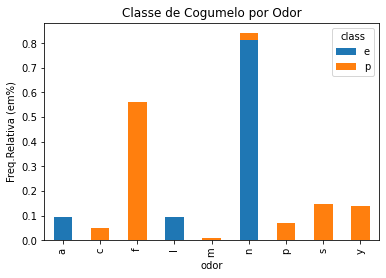

In [155]:
plot = tabela_odor.T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Odor')
#plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()